# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns; sns.set_theme(); sns.set_style()
import warnings; warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# read

In [2]:
train = pd.read_csv('./input/FIFA_train.csv')
test  = pd.read_csv('./input/FIFA_test.csv')
sub   = pd.read_csv('./input/submission.csv')

In [3]:
train.shape, test.shape

((8932, 12), (3828, 11))

In [4]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [5]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [6]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [8]:
train['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [9]:
train['position'].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [10]:
train['prefer_foot'].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [11]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

# EDA

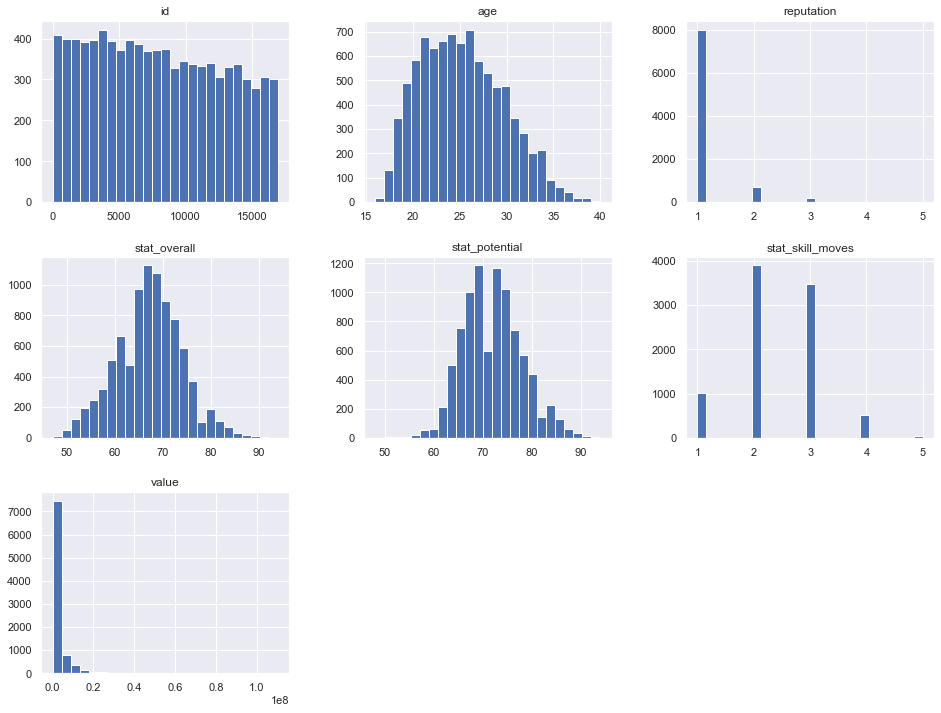

In [12]:
train.hist(figsize=(16, 12), bins=25); plt.show()

<AxesSubplot:>

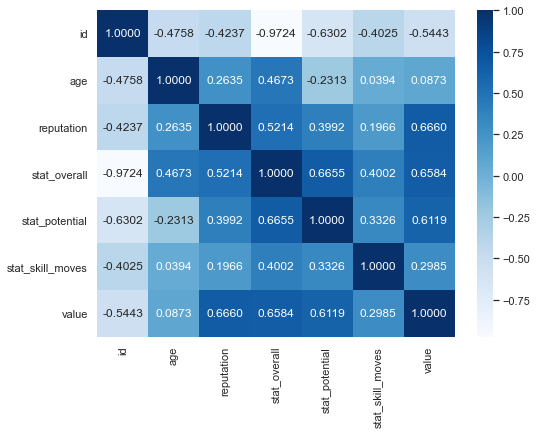

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), annot=True, fmt='.4f', cmap='Blues')

# derived feat

In [14]:
train[train['stat_overall'] > train['stat_potential']]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value


In [15]:
test[test['stat_overall'] > test['stat_potential']]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves


In [16]:
# growth_rate = stat_overall / stat_potential

train['growth_rate'] = train['stat_overall'] / train['stat_potential']
test['growth_rate'] = test['stat_overall'] / test['stat_potential']

In [17]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,growth_rate
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742


In [18]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [19]:
test['contract_until'].value_counts()

2021            985
2019            943
2020            882
2022            338
2023            251
Jun 30, 2019    209
2018            155
Dec 31, 2018     34
May 31, 2019     14
2025              4
Jun 30, 2020      4
2024              2
Jan 31, 2019      2
Jan 1, 2019       1
May 31, 2020      1
Jun 1, 2019       1
Dec 31, 2019      1
2026              1
Name: contract_until, dtype: int64

In [20]:
replace_dates = [
    'Jun 30, 2019', 'Dec 31, 2018', 'May 31, 2019', 
    'Jan 31, 2019', 'Jun 30, 2020', 'Jan 1, 2019', 
    'May 31, 2020', 'Jan 12, 2019', 'Jun 1, 2019', 
    'Dec 31, 2019'
]
for date in replace_dates:
    train['contract_until'] = train['contract_until'].str.replace(date, date[-4:])
    test['contract_until']  = test['contract_until'].str.replace(date, date[-4:])

In [21]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [22]:
test['contract_until'].value_counts()

2019    1171
2021     985
2020     887
2022     338
2023     251
2018     189
2025       4
2024       2
2026       1
Name: contract_until, dtype: int64

In [23]:
train['contract_until'] = train['contract_until'].astype('int')
test['contract_until']  = test['contract_until'].astype('int')

In [24]:
train['contract_until'].dtype

dtype('int32')

In [25]:
# left = contract_until - 2018
train['left'] = train['contract_until'] - 2018
test['left']  = test['contract_until'] - 2018

In [26]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,growth_rate,left
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000,3
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495,2
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000,3
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000,2
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742,3


# drop

In [27]:
train.drop(['id', 'name'], axis=1, inplace=True)
test.drop(['id', 'name'], axis=1, inplace=True)

# scale

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['contract_until']])

train['contract_until'] = scaler.transform(train[['contract_until']])
test['contract_until']  = scaler.transform(test[['contract_until']])

In [29]:
train['value'] = np.log1p(train['value'])

# get_dummies

In [30]:
df = pd.concat([train, test], axis=0)
print(df.shape)
df.head()

(12760, 12)


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,growth_rate,left
0,31,south america,0.375,ST,left,5.0,94,94,4.0,18.520526,1.000000,3
1,27,europe,0.250,GK,right,4.0,91,93,1.0,18.092177,0.978495,2
2,31,south america,0.375,ST,right,5.0,91,91,3.0,18.197537,1.000000,3
3,32,europe,0.250,DF,right,4.0,91,91,3.0,17.747336,1.000000,2
4,25,europe,0.375,GK,right,3.0,90,93,1.0,18.035018,0.967742,3


In [31]:
df = pd.get_dummies(df)
df.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,growth_rate,left,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,0.375,5.0,94,94,4.0,18.520526,1.000000,3,0,0,0,0,1,0,0,0,1,1,0
1,27,0.250,4.0,91,93,1.0,18.092177,0.978495,2,0,0,1,0,0,0,1,0,0,0,1
2,31,0.375,5.0,91,91,3.0,18.197537,1.000000,3,0,0,0,0,1,0,0,0,1,0,1
3,32,0.250,4.0,91,91,3.0,17.747336,1.000000,2,0,0,1,0,0,1,0,0,0,0,1
4,25,0.375,3.0,90,93,1.0,18.035018,0.967742,3,0,0,1,0,0,0,1,0,0,0,1


In [32]:
train = df[df['value'].notna()]
test  = df[df['value'].isna()]

# train

In [33]:
X = train.drop('value', axis=1)
y = train['value']

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [39]:
boost = GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1, 
    n_estimators=1000, 
    subsample=1.0, 
    alpha=0.9, 
    random_state=0, 
)

bag = BaggingRegressor(
    base_estimator=boost, 
    n_estimators=1000, 
    max_samples=1.0, 
    max_features=1.0, 
    bootstrap=True, 
    oob_score=False, 
    random_state=0, 
)

bag.fit(X, y)

BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=1000,
                                                          random_state=0),
                 n_estimators=1000, random_state=0)

In [42]:
test.drop('value', axis=1, inplace=True)
pred = bag.predict(test)

In [44]:
np.expm1(pred)

array([6.08931658e+07, 1.07322261e+08, 8.99040647e+07, ...,
       5.72893715e+04, 5.31208019e+04, 5.36933355e+04])

In [45]:
sub['value'] = np.expm1(pred)

In [46]:
sub.head()

,id,value
0,1,6.089317e+07
1,2,1.073223e+08
2,4,8.990406e+07
3,5,9.584148e+07
4,6,6.369324e+07


In [47]:
# sub.to_csv('./sub/sub_00.csv', index=False)